# SCALING EXERCISES

<h5>Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.</h5>

-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer


from wrangle import new_telco_data, acquire_telco, clean_telco, wrangle_telco
from prepare import get_scaled

--------

<h5>Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .</h5>

------

In [2]:
# grab the data from SQL, use acquire to convert to .csv (if needed), finish with prepping with clean_telco(df)

df = new_telco_data()
df = acquire_telco()
df = clean_telco(df)



In [3]:
# check data types of df to make sure the prepping happened

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1695 non-null   float64
 1   tenure           1695 non-null   int64  
 2   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 53.0+ KB


In [4]:
train_scaled, validate_scaled, test_scaled = get_scaled()

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

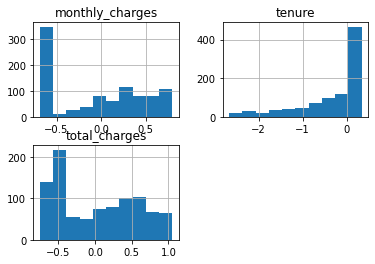

In [5]:
train_scaled.hist()

<h2>Let's visualize the data-set before splitting to view for any outliers</h2>

In [ ]:
sns.boxplot(x="total_charges", data=df)

In [ ]:
sns.boxplot(x="tenure", data=df)

In [ ]:
sns.boxplot(x="monthly_charges", data=df)

In [ ]:
df.total_charges.hist(bins=20)

In [ ]:
df.tenure.hist(bins=20)

In [ ]:
df.monthly_charges.hist(bins=20)


In [ ]:
# create the split dataset that will be used for scaling purposes in this exercise

train, validate, test  = wrangle_telco()

In [ ]:
(train.shape, validate.shape, test.shape)

<h3> Let's jump into the scaling section of the exercise</h3>

In [ ]:
# Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [ ]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
scaler.fit(train)

In [ ]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [ ]:
train_scaled[0:5]

In [ ]:
# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(df)


plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(df)

In [ ]:
train_scaled.head()

In [ ]:
train_scaled.tenure.hist(bins=20)

In [ ]:
train_scaled.monthly_charges.hist(bins=20)

In [ ]:
train_scaled.total_charges.hist(bins=20)

In [ ]:
sns.scatterplot(x="tenure", y="total_charges", data=train_scaled)

<h4> Standard Scaler</h4>

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

In [ ]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(df)


plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(df)

------

<h4>Robust Scaler</h4>

------

In [ ]:
scaler = sklearn.preprocessing.RobustScaler()

In [ ]:
scaler.fit(train)

In [ ]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.legend(train)

-------

<h3> Inverse Transform </h3>

<h4>Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?</h4>

------

<b>MinMax Inverse Transform</b>

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [ ]:
scaler.fit(train)

In [ ]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled - Inverse')
plt.legend(train)

<b>Standard Inverse Transform</b>

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()

In [ ]:
scaler.fit(train)

In [ ]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled - Inverse')
plt.legend(train)

<b> Robust Scaler </b>

In [ ]:
scaler = sklearn.preprocessing.RobustScaler()

In [ ]:
scaler.fit(train)

In [ ]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled - Inverse')
plt.legend(train)

----------
<h3> Quantile Transformer </h3>


<h5>Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.</h5>

-----

In [ ]:
qt = QuantileTransformer(output_distribution='normal')

In [ ]:
qt.fit(train)

In [ ]:

train_scaled = qt.transform(train)


In [ ]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Quantile Transform')


In [ ]:
train_scaled.hist()

<h3>Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?</h3>

In [ ]:
qt = QuantileTransformer()

In [ ]:
qt.fit(train)

In [ ]:

train_scaled = qt.transform(train)


In [ ]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.legend(train)

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Quantile Transform')

In [ ]:
train_scaled.hist()

When the output distribution argurment is left out (the default becomes 'uniform') A uniform distribution shows an equal spread without peak as opposed to a normal distribution which will show the common 'bell curve'. 